# Options Portfolio

In [1]:
import os
os.chdir(os.path.pardir)
os.chdir(os.path.pardir)

In [2]:
import datetime
import numpy as np
import matplotlib.pyplot

from copy import copy
from src.trading.market.option import CallOptionMarket, PutOptionMarket
from src.trading.market_actor.stub import MarketActorStub
from src.trading.market_listener.stub import MarketListenerStub
from src.trading.price_model.gbm import GBMPriceModel
from src.trading.price_model.price_distribution import PortfolioPriceDistribution


In [3]:
corr_ab = -.5
sigma_a, sigma_b = .2, .1

price_model = GBMPriceModel(
    asset_tickers=["SA", "SB"],
    asset_spot_prices=[1., 2.],
    asset_ret_drift=[0.2, 0.1],
    asset_ret_covar_mat=np.array([
        [sigma_a ** 2, corr_ab * sigma_a * sigma_b],
        [corr_ab * sigma_a * sigma_b, sigma_b ** 2],
    ]),
    risk_free_rate=.06,
    log_ret_values=True
)

In [4]:
from src.trading.portfolio import Portfolio
from src.trading.portfolio.balance import AssetBalance
from src.trading.portfolio.balance.option import CallOptionBalance, PutOptionBalance

In [5]:
price_dist_sa = price_model.get_asset_price_dist("SA")
price_dist_ca = price_model.get_call_option_price_dist("SA", strike_price=1.,
        time_to_expiry=3, option_ticker="CA")
price_dist_pa = price_model.get_put_option_price_dist("SA", strike_price=1.,
        time_to_expiry=3, option_ticker="PA")

price_dist_sb = price_model.get_asset_price_dist("SB")
price_dist_cb = price_model.get_call_option_price_dist("SB", strike_price=2.,
        time_to_expiry=3, option_ticker="CB")
price_dist_pb = price_model.get_put_option_price_dist("SB", strike_price=2.,
        time_to_expiry=3, option_ticker="PB")

In [6]:
portfolio_price_dist = PortfolioPriceDistribution(price_model)

portfolio_price_dist.add(price_dist_sa, 1)
portfolio_price_dist.add(price_dist_ca, 1)
portfolio_price_dist.add(price_dist_pa, 1)
portfolio_price_dist.add(price_dist_sb, 1)
portfolio_price_dist.add(price_dist_cb, 1)
portfolio_price_dist.add(price_dist_pb, 1)

results = price_model.simulate_prices(1000000, 2, 1)
simulated_prices = portfolio_price_dist.get_simulated_values_vect(results)

In [7]:
t = 2
covar_mat = portfolio_price_dist.get_covar_mat(t)
tickers = list(portfolio_price_dist.ticker_to_dists.keys())

for i in range(len(tickers)):
    for j in range(i, len(tickers)):
        print(
            tickers[i], tickers[j],
            round(covar_mat[i, j], 3),
            round(np.cov(simulated_prices[i, t, :], simulated_prices[j, t, :])[0, 1], 3)
        )

SA SA 0.185 0.185
SA CA 0.175 0.175
SA PA -0.01 -0.01
SA SB -0.072 -0.072
SA CB -0.068 -0.068
SA PB 0.005 0.005
CA CA 0.167 0.167
CA PA -0.008 -0.008
CA SB -0.067 -0.067
CA CB -0.027 -0.063
CA PB 0.004 0.004
PA PA 0.002 0.002
PA SB 0.005 0.005
PA CB 0.005 0.005
PA PB -0.0 -0.0
SB SB 0.121 0.121
SB CB 0.115 0.115
SB PB -0.006 -0.006
CB CB 0.109 0.11
CB PB -0.005 -0.005
PB PB 0.001 0.001


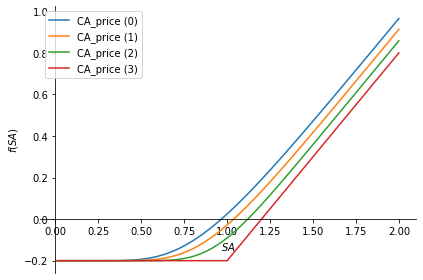

In [18]:
price_dist_ca.plot(t=[0, 1, 2, 3], plot_range=[0, 2], plot_fn=True, constant_offset=-.2)